<a href="https://colab.research.google.com/github/felipemartinsn/alzheimer-prediction/blob/main/alzheimer_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install opendatasets
!pip install pandas

In [ ]:
import opendatasets as od
import pandas as pd

In [ ]:
od.download("https://www.kaggle.com/datasets/ankushpanday1/alzheimers-prediction-dataset-global")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: felipemartins0
Your Kaggle Key: ··········
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/ankushpanday1/alzheimers-prediction-dataset-global


100%|██████████| 1.45M/1.45M [00:00<00:00, 38.8MB/s]

In [ ]:
file = "/content/alzheimers-prediction-dataset-global/alzheimers_prediction_dataset.csv"
df = pd.read_csv(file)

# Visualização e tratamento dos dados

In [ ]:
display(df)

,Country,Age,Gender,Education Level,BMI,Physical Activity Level,Smoking Status,Alcohol Consumption,Diabetes,Hypertension,...,Dietary Habits,Air Pollution Exposure,Employment Status,Marital Status,Genetic Risk Factor (APOE-ε4 allele),Social Engagement Level,Income Level,Stress Levels,Urban vs Rural Living,Alzheimer’s Diagnosis
0,Spain,90,Male,1,33.0,Medium,Never,Occasionally,No,No,...,Healthy,High,Retired,Single,No,Low,Medium,High,Urban,No
1,Argentina,72,Male,7,29.9,Medium,Former,Never,No,No,...,Healthy,Medium,Unemployed,Widowed,No,High,Low,High,Urban,No
2,South Africa,86,Female,19,22.9,High,Current,Occasionally,No,Yes,...,Average,Medium,Employed,Single,No,Low,Medium,High,Rural,No
3,China,53,Male,17,31.2,Low,Never,Regularly,Yes,No,...,Healthy,Medium,Retired,Single,No,High,Medium,Low,Rural,No
4,Sweden,58,Female,3,30.0,High,Former,Never,Yes,No,...,Unhealthy,High,Employed,Married,No,Low,Medium,High,Rural,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74278,Russia,60,Female,3,22.6,High,Former,Never,No,No,...,Average,High,Unemployed,Widowed,No,Medium,High,Medium,Rural,No
74279,UK,58,Male,18,30.6,Low,Never,Occasionally,Yes,No,...,Average,Medium,Unemployed,Single,No,Medium,High,High,Rural,No
74280,Spain,57,Female,13,28.2,Medium,Never,Regularly,No,No,...,Healthy,Low,Employed,Single,Yes,High,Low,Low,Rural,No
74281,Brazil,73,Female,7,29.0,Low,Never,Regularly,No,No,...,Healthy,Low,Employed,Widowed,No,Low,Low,High,Rural,No


In [ ]:
df.info()

In [ ]:
df.nunique()

## Tratamento das colunas com Yes e No

In [ ]:
def convert_yes_no(df, columns):
    """
    Converte colunas especificadas de 'Yes'/'No' para 1/0 em um DataFrame.

    :param df: DataFrame do pandas
    :param columns: Lista de colunas a serem convertidas
    :return: DataFrame modificado
    """
    df_copy = df.copy()
    for col in columns:
        df_copy[col] = df_copy[col].map({'Yes': 1, 'No': 0})
    return df_copy

In [ ]:
converted_df = convert_yes_no(df, ['Diabetes', 'Hypertension', 'Family History of Alzheimer’s', 'Genetic Risk Factor (APOE-ε4 allele)', 'Alzheimer’s Diagnosis'])

## Tratamento das colunas com Low, Normal/Medium e High

In [ ]:
def convert_low_med_high(df, columns):
    """
    Converte colunas especificadas de 'Low'/'Medium'/'High' para 0/1/2 em um DataFrame.

    :param df: DataFrame do pandas
    :param columns: Lista de colunas a serem convertidas
    :return: DataFrame modificado
    """
    df_copy = df.copy()
    mapping = {'Low': 0, 'Medium': 1, 'Normal': 1, 'High': 2}
    for col in columns:
        df_copy[col] = df_copy[col].map(mapping)
    return df_copy

In [ ]:
converted_df = convert_low_med_high(converted_df, ['Physical Activity Level', 'Cholesterol Level', 'Depression Level', 'Air Pollution Exposure', 'Social Engagement Level',
       'Income Level', 'Stress Levels'])

## Tratamento das demais colunas

In [ ]:
def convert_classes(df, columns):
    """
    Converte colunas especificadas de 'Female'/'Male' para 0/1 em um DataFrame.
    Converte colunas especificadas de Smoking Status 'Never'/'Former'/'Current' para 0/1/2 em um DataFrame.
    Converte colunas especificadas de Alcohol Consumption 'Never'/'Occasionally'/'Regularly' para 0/1/2 em um DataFrame.
    Converte colunas especificadas de Sleep Quality 'Poor'/'Average'/'Good' para 0/1/2 em um DataFrame.
    Converte colunas especificadas de Dietary Habits 'Unhealthy'/'Average'/'Healthy' para 0/1/2 em um DataFrame.
    Converte colunas especificadas de Employment Status 'Unemployed'/'Employed'/'Retired' para 0/1/2 em um DataFrame.
    Converte colunas especificadas de Marital Status 'Single'/'Married'/'Widowed' para 0/1/2 em um DataFrame.
    Converte colunas especificadas de Urban vs Rural Living 'Rural'/'Urban' para 0/1 em um DataFrame.

    :param df: DataFrame do pandas
    :param columns: Lista de colunas a serem convertidas
    :return: DataFrame modificado
    """
    df_copy = df.copy()
    mapping = {'Female': 0, 'Never': 0, 'Poor': 0, 'Unhealthy': 0, 'Unemployed': 0, 'Single': 0, 'Rural': 0,
               'Male': 1, 'Male': 1, 'Former': 1, 'Occasionally': 1, 'Average': 1,'Employed': 1, 'Married': 1, 'Urban': 1,
               'Current': 2, 'Regularly': 2, 'Good': 2, 'Healthy': 2, 'Retired': 2, 'Widowed': 2
               }
    for col in columns:
        df_copy[col] = df_copy[col].map(mapping)
    return df_copy

In [ ]:
converted_df = convert_classes(converted_df, ['Gender','Smoking Status', 'Alcohol Consumption', 'Sleep Quality', 'Dietary Habits', 'Employment Status', 'Marital Status', 'Urban vs Rural Living'])

In [ ]:
converted_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74283 entries, 0 to 74282
Data columns (total 25 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Country                               74283 non-null  object 
 1   Age                                   74283 non-null  int64  
 2   Gender                                74283 non-null  int64  
 3   Education Level                       74283 non-null  int64  
 4   BMI                                   74283 non-null  float64
 5   Physical Activity Level               74283 non-null  int64  
 6   Smoking Status                        74283 non-null  int64  
 7   Alcohol Consumption                   74283 non-null  int64  
 8   Diabetes                              74283 non-null  int64  
 9   Hypertension                          74283 non-null  int64  
 10  Cholesterol Level                     74283 non-null  int64  
 11  Family History 

In [ ]:
converted_df = converted_df.drop('Country', axis=1)

In [ ]:
converted_df.describe()

,Age,Gender,Education Level,BMI,Physical Activity Level,Smoking Status,Alcohol Consumption,Diabetes,Hypertension,Cholesterol Level,...,Dietary Habits,Air Pollution Exposure,Employment Status,Marital Status,Genetic Risk Factor (APOE-ε4 allele),Social Engagement Level,Income Level,Stress Levels,Urban vs Rural Living,Alzheimer’s Diagnosis
count,74283.000000,74283.000000,74283.000000,74283.000000,74283.000000,74283.000000,74283.000000,74283.000000,74283.000000,74283.000000,...,74283.000000,74283.000000,74283.000000,74283.000000,74283.000000,74283.000000,74283.000000,74283.000000,74283.000000,74283.000000
mean,71.964703,0.498553,9.487514,26.780639,1.001333,1.002356,0.998290,0.198646,0.298171,1.300338,...,1.000135,1.003366,0.999004,0.991546,0.198188,0.999596,0.999663,0.999152,0.499172,0.413459
std,12.980748,0.500001,5.757020,4.764679,0.817201,0.817594,0.817168,0.398983,0.457458,0.458408,...,0.815215,0.816825,0.816551,0.818007,0.398637,0.815694,0.818141,0.815471,0.500003,0.492457
min,50.000000,0.000000,0.000000,18.500000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,61.000000,0.000000,4.000000,22.700000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,72.000000,0.000000,9.000000,26.800000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000
75%,83.000000,1.000000,14.000000,30.900000,2.000000,2.000000,2.000000,0.000000,1.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,0.000000,2.000000,2.000000,2.000000,1.000000,1.000000
max,94.000000,1.000000,19.000000,35.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,1.000000,1.000000


In [ ]:
converted_df['Alzheimer’s Diagnosis'].value_counts()*100/len(df)

,count
Alzheimer’s Diagnosis,
0,58.654066
1,41.345934


# Análise Exploratória de Dados

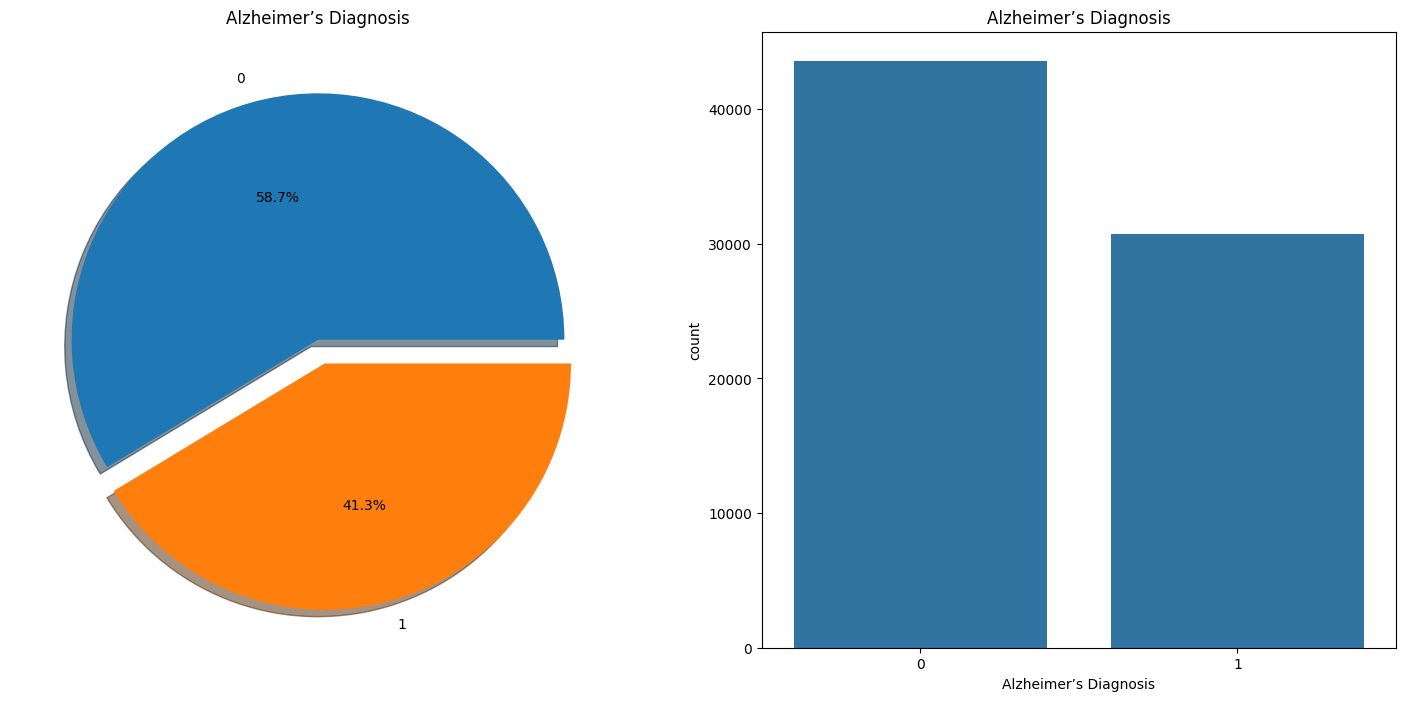

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
f,ax = plt.subplots(1,2, figsize=(18,8))
converted_df['Alzheimer’s Diagnosis'].value_counts().plot.pie(explode=[0,0.1],autopct = "%1.1f%%", ax=ax[0], shadow=True)
ax[0].set_title('Alzheimer’s Diagnosis')
ax[0].set_ylabel('')
sns.countplot(x='Alzheimer’s Diagnosis', data=converted_df, ax=ax[1])
ax[1].set_title('Alzheimer’s Diagnosis')
plt.show()
# 0 for No, 1 for Yes

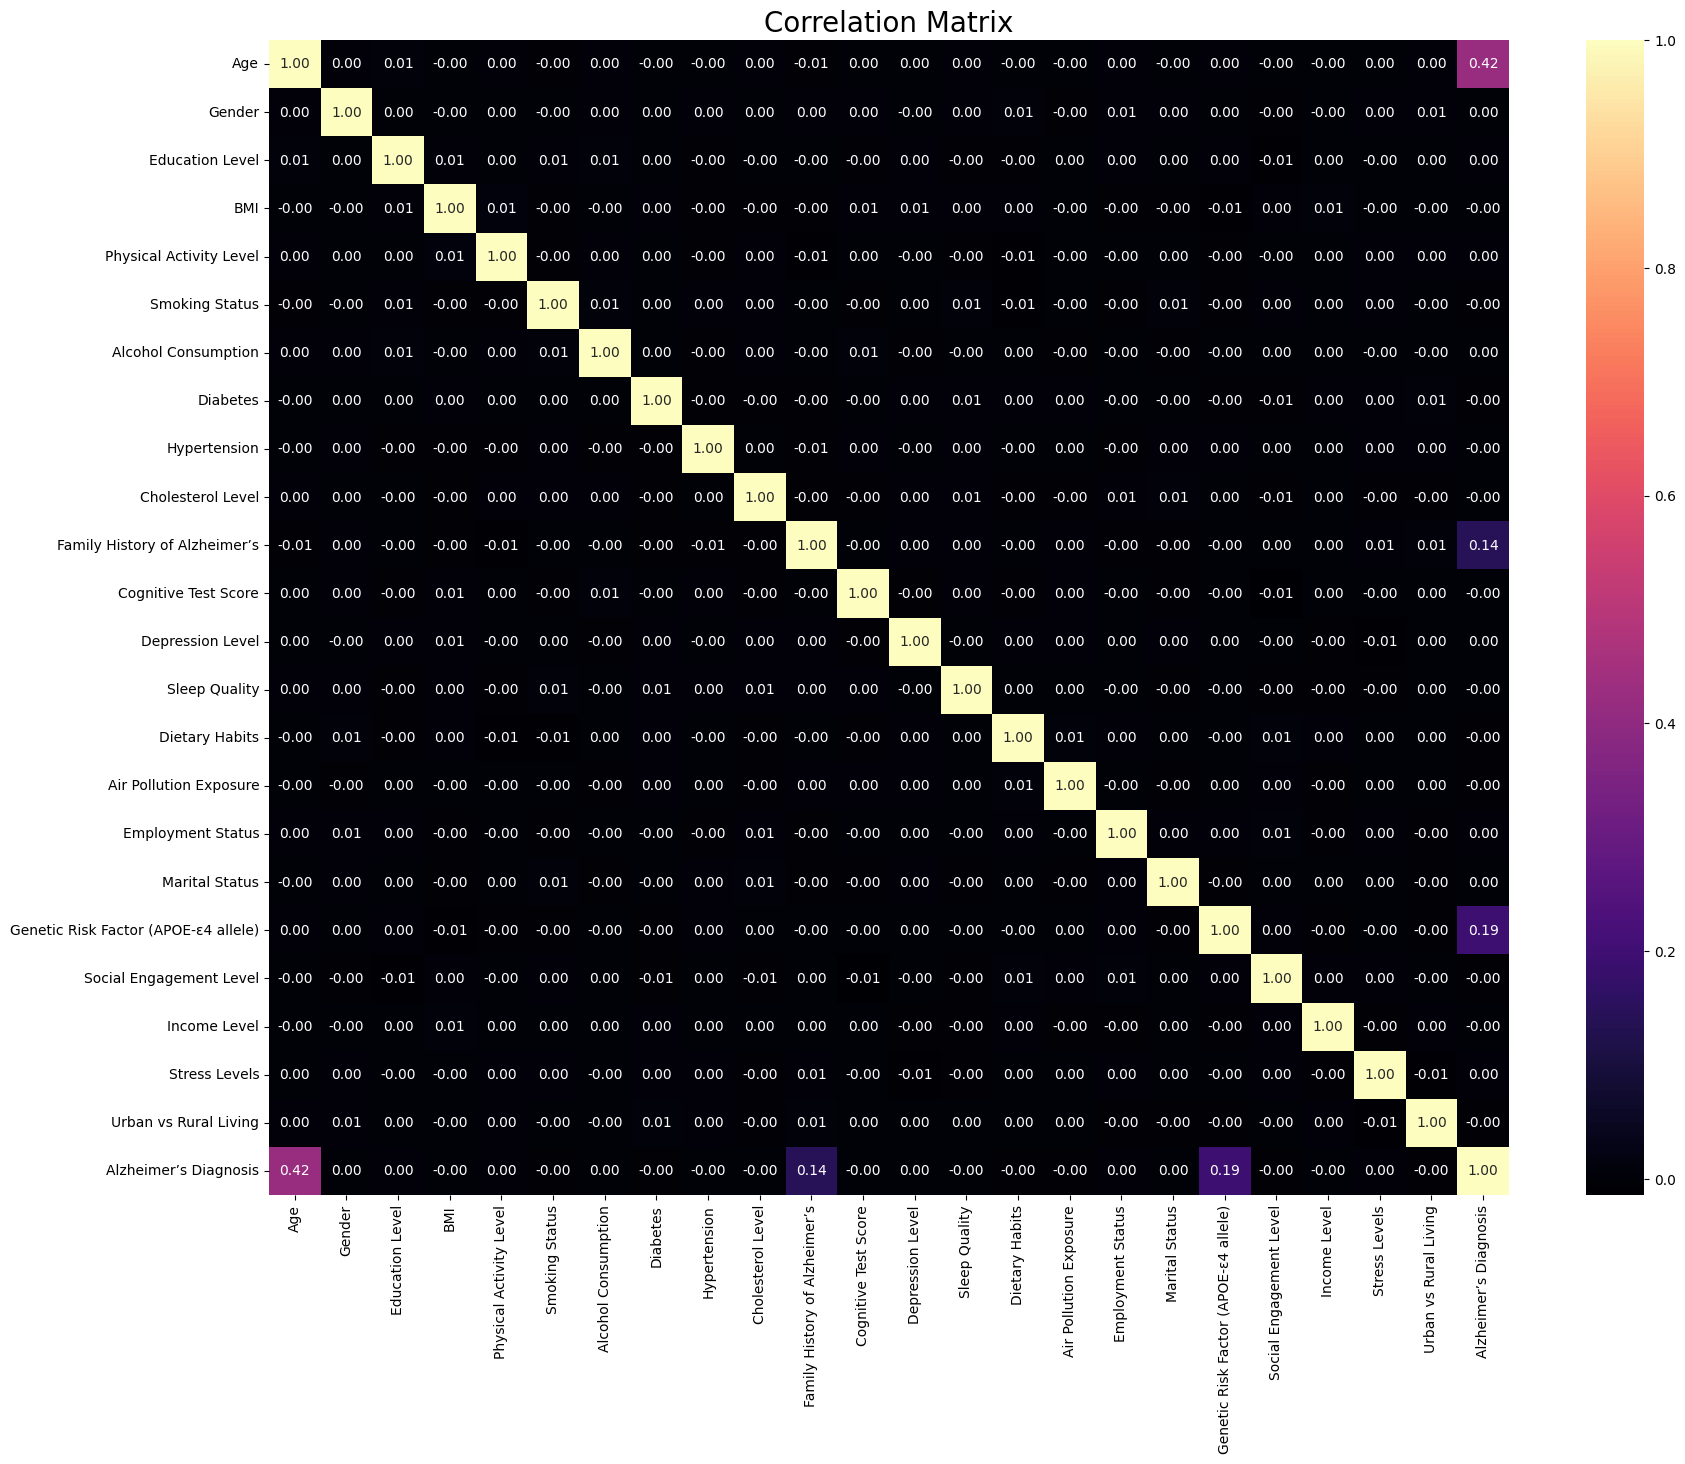

In [ ]:
f,ax = plt.subplots(figsize=[20,15])
sns.heatmap(converted_df.corr(), annot=True, fmt = '.2f', ax=ax, cmap='magma')
ax.set_title("Correlation Matrix", fontsize=20)
plt.show()

<Axes: xlabel='Age', ylabel='Count'>

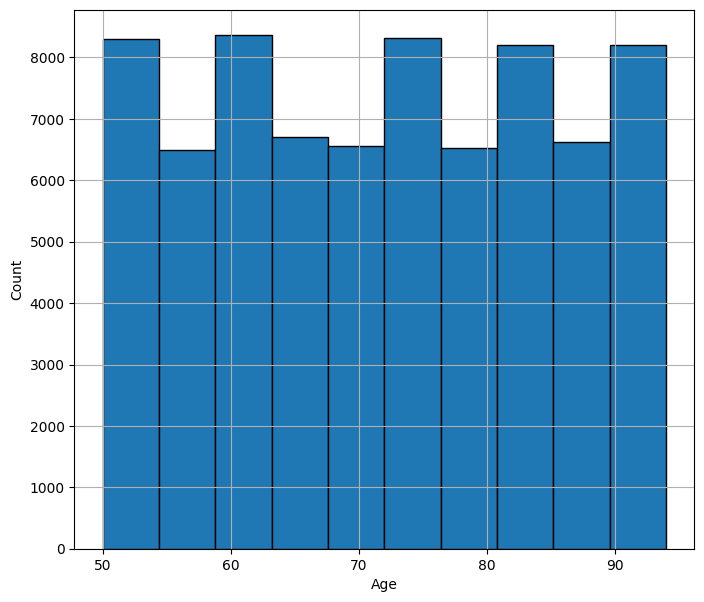

In [ ]:
plt.figure(figsize=(8,7))
plt.xlabel('Age', fontsize=10)
plt.ylabel('Count', fontsize=10)
df['Age'].hist(edgecolor="black")

In [ ]:
df_selected = converted_df[['Age', 'Family History of Alzheimer’s', 'Genetic Risk Factor (APOE-ε4 allele)', 'Alzheimer’s Diagnosis']]

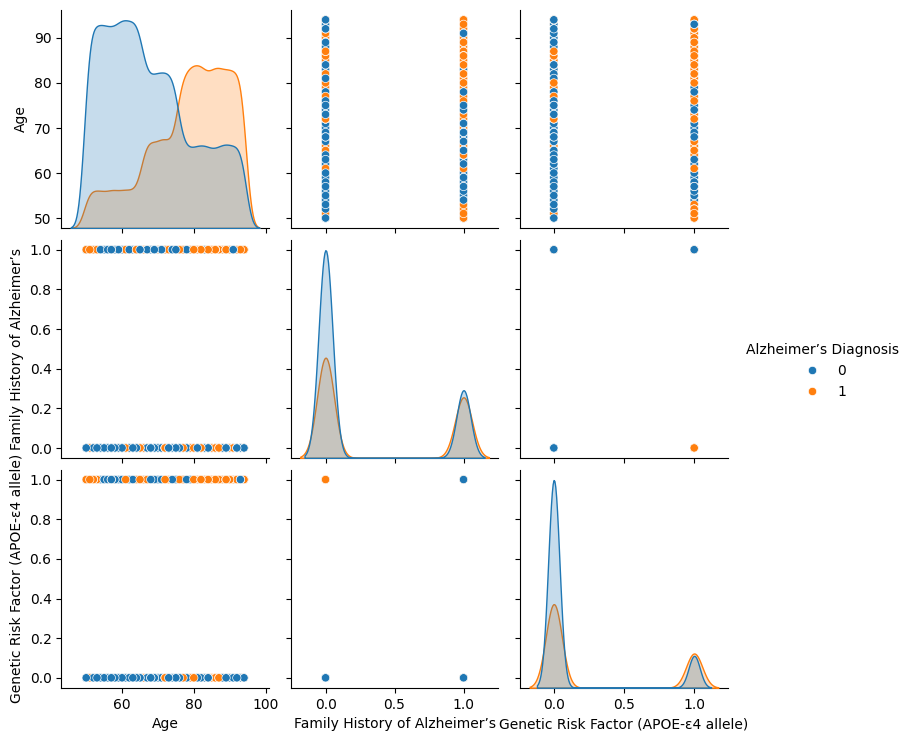

In [ ]:
p = sns.pairplot(df_selected, hue="Alzheimer’s Diagnosis")

In [ ]:
X = pd.DataFrame(df_selected.drop(['Alzheimer’s Diagnosis'], axis=1))
y = converted_df['Alzheimer’s Diagnosis']
cols = X.columns
index = X.index

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train , y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Testar diferentes regularizações
    'penalty': ['l1', 'l2'],  # Regularização L1 ou L2
    'solver': ['liblinear', 'saga']  # Solvers compatíveis
}

grid = GridSearchCV(LogisticRegression(max_iter=500), param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

print("Melhores parâmetros:", grid.best_params_)
print("Melhor acurácia:", grid.best_score_)

Melhores parâmetros: {'C': 0.001, 'penalty': 'l1', 'solver': 'liblinear'}
Melhor acurácia: 0.714098193106564


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

# 6. Executar o Grid Search
grid_search.fit(X_train, y_train)
print("Melhores hiperparâmetros:", grid_search.best_params_)


print("Melhores parâmetros:", grid_search.best_params_)
print("Melhor acurácia:", grid_search.best_score_)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Melhores hiperparâmetros: {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Melhores parâmetros: {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Melhor acurácia: 0.7251539024745742


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Acurácia:", accuracy_score(y_test, y_pred_rf))


Acurácia: 0.7218819411725113


In [ ]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train, log_reg.predict(X_train))

0.7093696361861811

In [ ]:
from sklearn.ensemble import VotingClassifier, StackingClassifier
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report

smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
svc = SVC(probability=True, random_state=42)
lr = LogisticRegression(random_state=42)

voting_clf_hard = VotingClassifier(estimators=[
    ('rf', rf),
    ('svc', svc),
    ('lr', lr)
], voting='hard')

voting_clf_soft = VotingClassifier(estimators=[
    ('rf', rf),
    ('svc', svc),
    ('lr', lr)
], voting='soft')

stacking_clf = StackingClassifier(estimators=[
    ('rf', rf),
    ('svc', svc),
    ('lr', lr)
], final_estimator=LogisticRegression())

# Voting Classifier (hard voting)
voting_clf_hard.fit(X_train, y_train)
y_pred_hard = voting_clf_hard.predict(X_test)
print("Acurácia do Voting Classifier (hard voting):", accuracy_score(y_test, y_pred_hard))
print(classification_report(y_test, y_pred_hard))

voting_clf_soft.fit(X_train, y_train)
y_pred_soft = voting_clf_soft.predict(X_test)
print("Acurácia do Voting Classifier (soft voting):", accuracy_score(y_test, y_pred_soft))
print(classification_report(y_test, y_pred_soft))

# Stacking Classifier
stacking_clf.fit(X_train, y_train)
y_pred_stacking = stacking_clf.predict(X_test)
print("Acurácia do Stacking Classifier:", accuracy_score(y_test, y_pred_stacking))
print(classification_report(y_test, y_pred_stacking))


Acurácia do Voting Classifier (hard voting): 0.7208050077404591
              precision    recall  f1-score   support

           0       0.82      0.68      0.74      8769
           1       0.63      0.78      0.70      6088

    accuracy                           0.72     14857
   macro avg       0.72      0.73      0.72     14857
weighted avg       0.74      0.72      0.72     14857

Acurácia do Voting Classifier (soft voting): 0.7217473244935048
              precision    recall  f1-score   support

           0       0.82      0.68      0.74      8769
           1       0.63      0.78      0.70      6088

    accuracy                           0.72     14857
   macro avg       0.72      0.73      0.72     14857
weighted avg       0.74      0.72      0.72     14857

Acurácia do Stacking Classifier: 0.7207376994009558
              precision    recall  f1-score   support

           0       0.82      0.67      0.74      8769
           1       0.63      0.79      0.70      6088

  

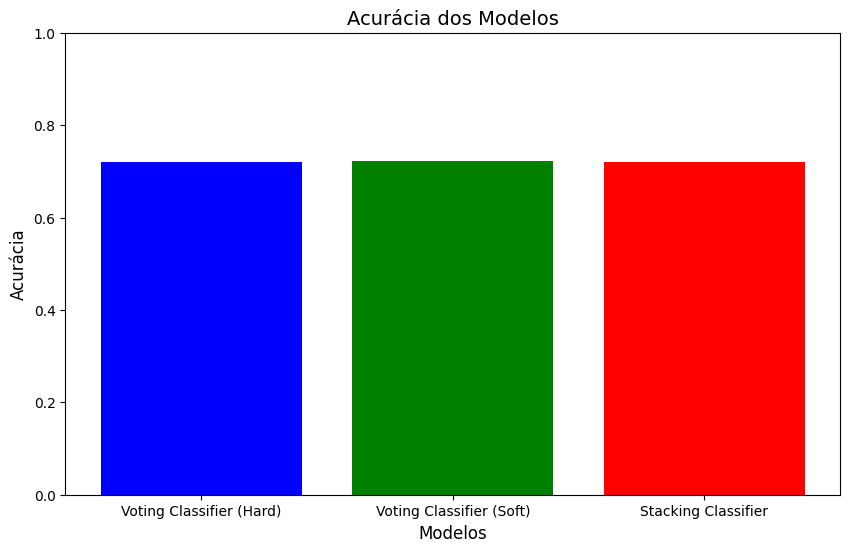

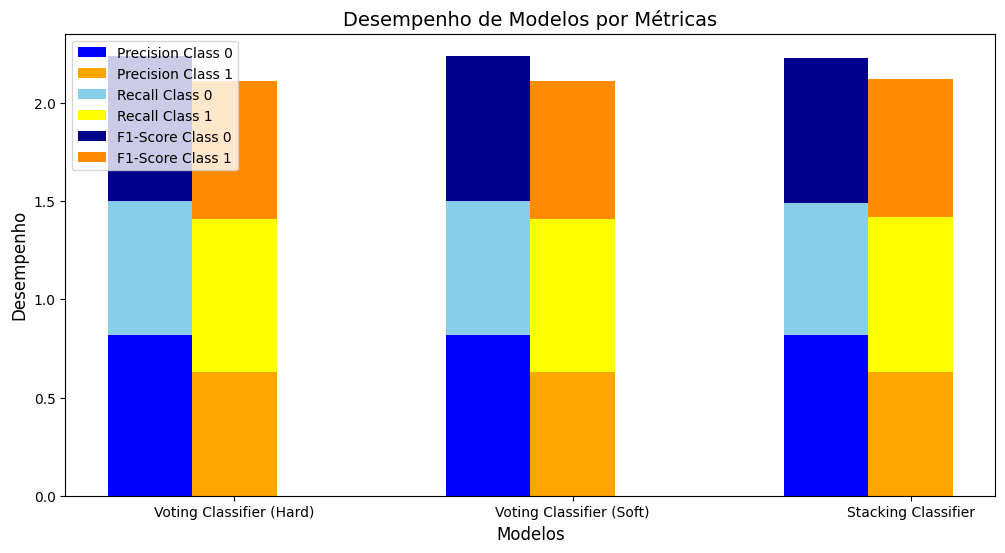

In [ ]:
from sklearn.metrics import classification_report

models = ['Voting Classifier (Hard)', 'Voting Classifier (Soft)', 'Stacking Classifier']
accuracies = [0.7208050077404591, 0.7217473244935048, 0.7207376994009558]
precisions_0 = [0.82, 0.82, 0.82]
precisions_1 = [0.63, 0.63, 0.63]
recalls_0 = [0.68, 0.68, 0.67]
recalls_1 = [0.78, 0.78, 0.79]
f1_scores_0 = [0.74, 0.74, 0.74]
f1_scores_1 = [0.70, 0.70, 0.70]


fig, ax = plt.subplots(1, 1, figsize=(10, 6))
ax.bar(models, accuracies, color=['blue', 'green', 'red'])
ax.set_title('Acurácia dos Modelos', fontsize=14)
ax.set_ylabel('Acurácia', fontsize=12)
ax.set_ylim(0, 1)
ax.set_xlabel('Modelos', fontsize=12)
plt.show()

# Criando o gráfico de barras para precision, recall e f1-score
x = np.arange(len(models))
width = 0.25  # Largura das barras

fig, ax = plt.subplots(1, 1, figsize=(12, 6))

ax.bar(x - width, precisions_0, width, label='Precision Class 0', color='blue')
ax.bar(x, precisions_1, width, label='Precision Class 1', color='orange')

ax.bar(x - width, recalls_0, width, bottom=precisions_0, label='Recall Class 0', color='skyblue')
ax.bar(x, recalls_1, width, bottom=precisions_1, label='Recall Class 1', color='yellow')

ax.bar(x - width, f1_scores_0, width, bottom=np.add(precisions_0, recalls_0), label='F1-Score Class 0', color='darkblue')
ax.bar(x, f1_scores_1, width, bottom=np.add(precisions_1, recalls_1), label='F1-Score Class 1', color='darkorange')

ax.set_xlabel('Modelos', fontsize=12)
ax.set_ylabel('Desempenho', fontsize=12)
ax.set_title('Desempenho de Modelos por Métricas', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend(loc='upper left')
plt.show()


In [ ]:
import plotly.graph_objects as go

models = ['Voting Classifier (Hard)', 'Voting Classifier (Soft)', 'Stacking Classifier']
categories = ['Precision', 'Recall', 'F1-Score']

# Valores para a Classe 0
values_0 = [0.82, 0.68, 0.74]
values_1 = [0.82, 0.68, 0.74]
values_2 = [0.82, 0.67, 0.74]

# Valores para a Classe 1
values_3 = [0.63, 0.78, 0.70]
values_4 = [0.63, 0.78, 0.70]
values_5 = [0.63, 0.79, 0.70]

fig_0 = go.Figure()

fig_0.add_trace(go.Scatterpolar(r=values_0, theta=categories, fill='toself', name=models[0]))
fig_0.add_trace(go.Scatterpolar(r=values_1, theta=categories, fill='toself', name=models[1]))
fig_0.add_trace(go.Scatterpolar(r=values_2, theta=categories, fill='toself', name=models[2]))

fig_0.update_layout(
    polar=dict(
        radialaxis=dict(visible=True, range=[0, 1])
    ),
    title="Desempenho das Métricas (Classe 0)"
)

fig_1 = go.Figure()

fig_1.add_trace(go.Scatterpolar(r=values_3, theta=categories, fill='toself', name=models[0]))
fig_1.add_trace(go.Scatterpolar(r=values_4, theta=categories, fill='toself', name=models[1]))
fig_1.add_trace(go.Scatterpolar(r=values_5, theta=categories, fill='toself', name=models[2]))

fig_1.update_layout(
    polar=dict(
        radialaxis=dict(visible=True, range=[0, 1])
    ),
    title="Desempenho das Métricas (Classe 1)"
)

fig_0.show()
fig_1.show()

In [ ]:
import plotly.express as px
import pandas as pd

# Dados de desempenho
models = ['Voting Classifier (Hard)', 'Voting Classifier (Soft)', 'Stacking Classifier']
precisions_0 = [0.82, 0.82, 0.82]
precisions_1 = [0.63, 0.63, 0.63]
recalls_0 = [0.68, 0.68, 0.67]
recalls_1 = [0.78, 0.78, 0.79]
f1_scores_0 = [0.74, 0.74, 0.74]
f1_scores_1 = [0.70, 0.70, 0.70]

# Criando um DataFrame para organizar os dados
data = {
    'Model': models * 6,  # O modelo se repete 6 vezes
    'Metric': ['Precision Class 0', 'Precision Class 1', 'Recall Class 0', 'Recall Class 1', 'F1-Score Class 0', 'F1-Score Class 1'] * 3,  # Cada modelo tem 6 métricas
    'Value': precisions_0 + precisions_1 + recalls_0 + recalls_1 + f1_scores_0 + f1_scores_1  # Unindo todas as métricas
}

df_data = pd.DataFrame(data)

# Criando o gráfico de barras interativo
fig = px.bar(df_data,
             x='Model',
             y='Value',
             color='Metric',
             barmode='group',
             title="Desempenho dos Modelos por Métricas",
             labels={"Value": "Desempenho", "Model": "Modelo", "Metric": "Métrica"})

fig.update_layout(
    xaxis_title="Modelos",
    yaxis_title="Desempenho",
    title="Desempenho dos Modelos por Métricas (Precision, Recall, F1-Score)"
)

# Exibir gráfico
fig.show()
